In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [60]:
sample_set = pd.read_csv('train.csv')
final_set = pd.read_csv('test.csv')
final = final_set.drop("SalePrice", axis=1)
mean = sample_set.mean()
std = final_set.std()

# 
sample = (sample_set - mean) / std
final = (final - mean.drop("SalePrice")) / std.drop("SalePrice")

In [61]:
# Initialising variables and lists
m = np.zeros(len(sample.columns)-1) # M-gradient
b = 0 # B-gradient
L = 0.0001 # Learning Rate
cmse = 0
epochs = 1100 # epochs signifies number of iterations to reduce the error and make the function more accurate
msefunc = [0 for x in range(epochs)] # initialised list to store MSE values over different epochs

# Gradient Descent function
def gradient_descent(m_now, b_now, points, L):
  m_gradient = np.zeros(len(m_now))
  b_gradient = 0
  mse = 0
  cmse = 0
  n = len(points)

  for i in range(n):
    x = points.iloc[i][: -1].values
    y = points.iloc[i].SalePrice
    y_pred = np.dot(m_now,x) + b_now
    mse += (y_pred - y) ** 2
    cmse = (mse * std.SalePrice + mean.SalePrice)
    m_gradient += (-(2/n)) * x * (y - (m_now * x + b_now))
    b_gradient += (-(2/n)) * (y - (m_now * x + b_now))
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  cmse /= n
  temp=pd.Series(cmse)
  return m, b, temp[0]
    

In [62]:
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
        print(f"MSE: {cmse}")
    m, b, cmse = gradient_descent(m, b, train, L)
    msefunc[i] = cmse 

Epoch: 0
MSE: 0
Epoch: 50
MSE: 72251.93385392938
Epoch: 100
MSE: 66878.4524037674
Epoch: 150
MSE: 61853.769383723884
Epoch: 200
MSE: 57168.572432517096
Epoch: 250
MSE: 52813.75741831648
Epoch: 300
MSE: 48780.42408028081
Epoch: 350
MSE: 45059.87175870421
Epoch: 400
MSE: 41643.59521199384
Epoch: 450
MSE: 38523.28051873754
Epoch: 500
MSE: 35690.801063155785
Epoch: 550
MSE: 33138.21360226275
Epoch: 600
MSE: 30857.754413100545
Epoch: 650
MSE: 28841.835518436117
Epoch: 700
MSE: 27083.040989349025
Epoch: 750
MSE: 25574.123323165204
Epoch: 800
MSE: 24307.999895225366
Epoch: 850
MSE: 23277.74948300312
Epoch: 900
MSE: 22476.608861123736
Epoch: 950
MSE: 21897.969465855567
Epoch: 1000
MSE: 21535.37412768173
Epoch: 1050
MSE: 21382.51387058242


In [63]:
print (f"M-gradient (theta): {m}")
print (f"B-gradient: {b}")

M-gradient (theta): [0.15537683 0.13970329 0.12702818 0.12694336 0.12008748 0.11910768
 0.11060037 0.10468744 0.10377671 0.09823225]
B-gradient: [ 2.64921904e-17  2.98876490e-17  2.95595701e-17  3.14443621e-17
  2.84972007e-17  3.34080833e-17  2.94384224e-17  3.05623333e-17
  1.78385715e-17 -2.45841474e-17]


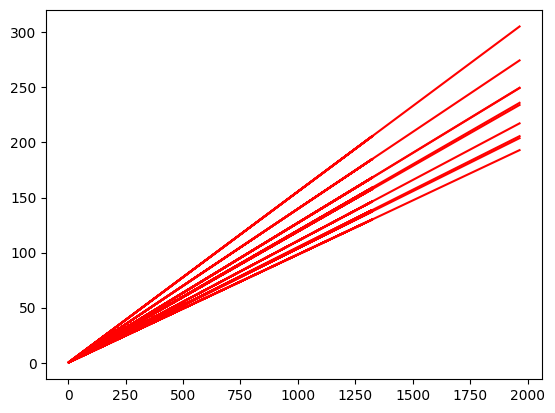

In [64]:
plt.plot (sample_set.iloc[i][: -1].values, [np.dot(m, x) + b for x in sample_set.iloc[i][: -1].values], color="red")
plt.show()

In [65]:
prediction = [np.dot(m,x) + b for x in final_set.drop("SalePrice", axis=1).values]
final_set['Predictions']= prediction
pred = []
k=0
for i in range (len(prediction)-1):
    if i%20 == 0:
        print(prediction [i][0])

1042.412136964631
943.8097804098891
833.9024597305107
865.0011958934667
1036.6328934662938
1138.383089639195
839.3667090008433
881.4656380438889
925.014821469352
841.9983547721951
956.054982384776
1207.4626886761105
925.8591612712795
794.6325237765943
783.9881003843014


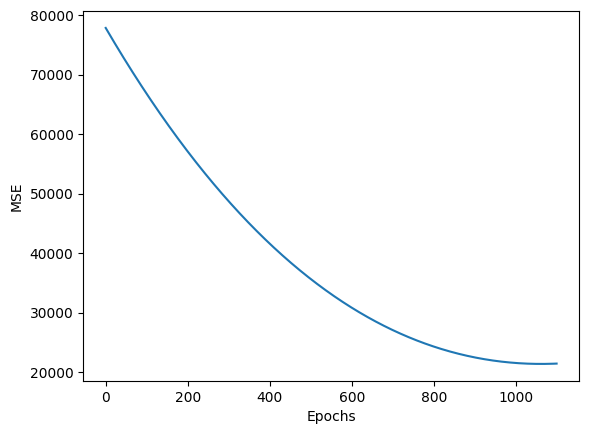


 Mean Squared Error: 21433.224776688243


In [66]:
plt.plot(range(epochs), msefunc)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()
print (f"\n Mean Squared Error: {cmse}")